In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Datamining/


 2019.csv		  'Data Science ML Full Stack Roadmap.pdf'   ieee-fraud-detection
 airline-passengers.csv    energy_dataset.csv			     realKnownCause
 california-house-prices   groceriesdataset2.csv		     station_day.csv
 city_hour.csv		   groceriesdataset.csv			     train.csv
 creditcard.csv		   house-prediction-train.csv		     TSLA.csv


In [ ]:
#Dataset Selection and Loading

import pandas as pd

# Replace with the actual path to your train.csv file in Google Drive
file_path = '/content/drive/MyDrive/Datamining/creditcard.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
#Sample phase

# Check class distribution to understand the imbalance
print(data['Class'].value_counts())

# Perform stratified sampling to maintain class ratio in sample
sample_data = data.groupby('Class', group_keys=False).apply(lambda x: x.sample(min(len(x), 5000)))

# Check the new class distribution after sampling
print(sample_data['Class'].value_counts())

# Proceed to EDA with the sampled data
sample_data.head()


Class
0    284315
1       492
Name: count, dtype: int64
Class
0    5000
1     492
Name: count, dtype: int64


<ipython-input-12-c577f6be680c>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_data = data.groupby('Class', group_keys=False).apply(lambda x: x.sample(min(len(x), 5000)))


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6261,7348.0,-1.105168,0.091473,3.387833,0.583496,0.076593,-0.663443,0.059071,-0.443164,1.783259,...,-0.271354,-0.004534,-0.358811,0.924260,0.005453,0.214096,-0.328562,-0.413394,20.00,0
128994,78916.0,-0.217876,0.325204,1.294765,-1.257038,-0.243773,-0.754809,0.934616,-0.821928,-0.909611,...,0.157780,0.750278,-0.374448,0.403231,0.295268,-0.197556,-0.689947,-0.452158,40.00,0
243201,151839.0,1.716406,0.006214,0.225664,3.616328,0.511249,2.635141,-0.953527,0.798904,-0.197024,...,-0.150769,-0.127114,0.385684,-1.689411,-0.622372,-0.191972,0.079479,-0.052535,1.00,0
194066,130427.0,2.085800,-0.007503,-2.051018,0.211332,0.605291,-0.893311,0.503455,-0.277635,0.002208,...,0.137768,0.500125,0.007131,0.826924,0.336715,0.660079,-0.126411,-0.089595,0.76,0
89021,62389.0,-0.459619,0.624382,0.882305,0.466138,1.319041,1.801905,0.713494,0.251769,-0.277259,...,0.169038,0.813560,-0.073858,-1.823222,-0.505755,-0.188533,-0.036452,-0.098473,41.80,0


                Time           V1           V2           V3           V4  \
count    5492.000000  5492.000000  5492.000000  5492.000000  5492.000000   
mean    93256.473416    -0.461115     0.308966    -0.614179     0.423058   
std     47891.872728     3.071945     2.300072     3.230479     2.041465   
min        49.000000   -34.591213   -44.639245   -31.103685    -4.964819   
25%     52722.500000    -1.114021    -0.547666    -1.221722    -0.758164   
50%     83328.000000    -0.215920     0.153267     0.033951     0.158401   
75%    138501.500000     1.268909     0.971554     0.976551     1.080872   
max    172640.000000     2.394434    22.057729     3.451724    12.114672   

                V5           V6           V7           V8           V9  ...  \
count  5492.000000  5492.000000  5492.000000  5492.000000  5492.000000  ...   
mean     -0.253042    -0.137753    -0.489833     0.052534    -0.228888  ...   
std       2.255555     1.460464     2.885557     2.285158     1.482879  ...   

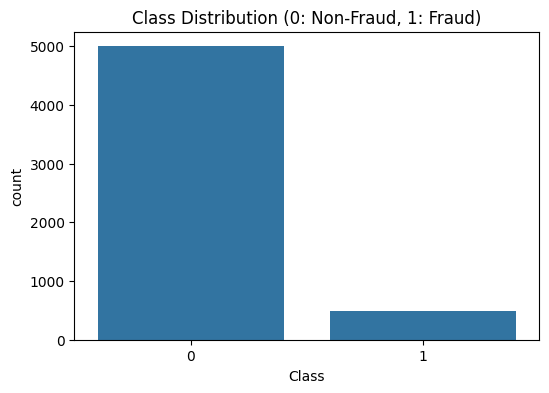

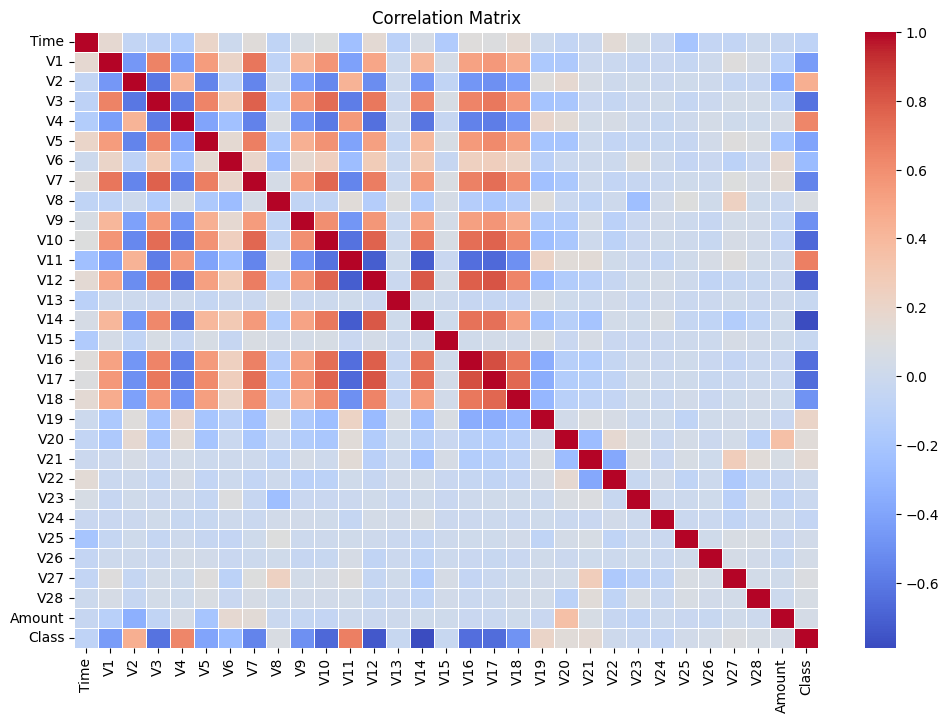

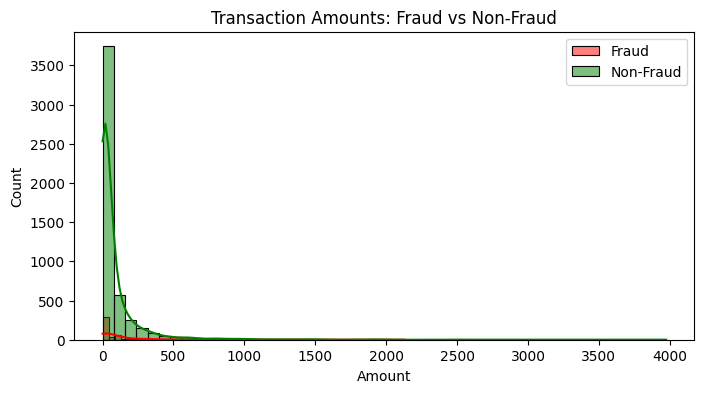

In [ ]:
#Explore phase

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary Statistics
print(sample_data.describe())

# 2. Class Distribution Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=sample_data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

print()
print()


# 3. Correlation Analysis
plt.figure(figsize=(12,8))
corr_matrix = sample_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print()
print()

# 4. Visualizing distributions of key features
fraud = sample_data[sample_data['Class'] == 1]
non_fraud = sample_data[sample_data['Class'] == 0]

# Visualize 'Amount' feature for fraud and non-fraud transactions
plt.figure(figsize=(8,4))
sns.histplot(fraud['Amount'], color='red', bins=50, kde=True, label='Fraud')
sns.histplot(non_fraud['Amount'], color='green', bins=50, kde=True, label='Non-Fraud')
plt.legend()
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.show()


In [ ]:
#Modify phase

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Check for missing values
print("Missing values in the dataset:\n", sample_data.isnull().sum())

# 2. Feature Scaling: Standardize the 'Amount' and 'Time' features since other features are already PCA-transformed
scaler = StandardScaler()
sample_data['scaled_amount'] = scaler.fit_transform(sample_data[['Amount']])
sample_data['scaled_time'] = scaler.fit_transform(sample_data[['Time']])

# Dropping the original 'Amount' and 'Time' columns
sample_data = sample_data.drop(['Amount', 'Time'], axis=1)

# 3. Handling Class Imbalance using SMOTE
X = sample_data.drop('Class', axis=1)  # Features
y = sample_data['Class']  # Target variable

# Applying SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the class distribution after applying SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

# 4. Feature Engineering: You can add any domain-specific features if needed
# For this dataset, most features are already anonymized and PCA-transformed, so we’ll use them as is

# Final data after modification
final_data = pd.DataFrame(X_resampled, columns=X.columns)
final_data['Class'] = y_resampled
print(final_data.head())


Missing values in the dataset:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class distribution after SMOTE:
 Class
0    5000
1    5000
Name: count, dtype: int64
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.105168  0.091473  3.387833  0.583496  0.076593 -0.663443  0.059071   
1 -0.217876  0.325204  1.294765 -1.257038 -0.243773 -0.754809  0.934616   
2  1.716406  0.006214  0.225664  3.616328  0.511249  2.635141 -0.953527   
3  2.085800 -0.007503 -2.051018  0.211332  0.605291 -0.893311  0.503455   
4 -0.459619  0.624382  0.882305  0.466138  1.319041  1.801905  0.713494   

         V8        V9       V10  ...       V22 

--- Logistic Regression ---
[[996  16]
 [ 71 917]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1012
           1       0.98      0.93      0.95       988

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

ROC-AUC Score: 0.9909
--- Decision Tree ---
[[982  30]
 [ 18 970]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1012
           1       0.97      0.98      0.98       988

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

ROC-AUC Score: 0.9761
--- Random Forest ---
[[1010    2]
 [  11  977]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1012
           1       1.00      0.99      0.99     

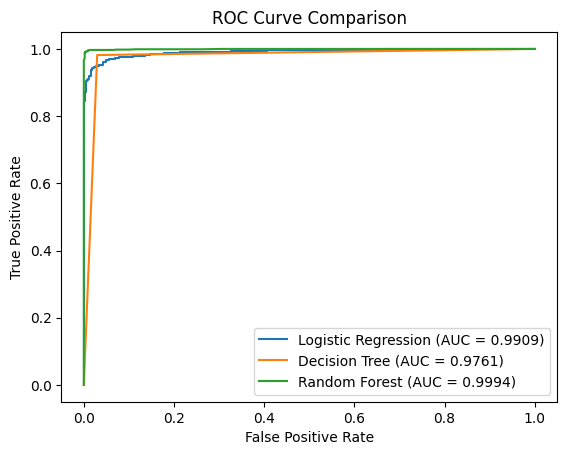

In [ ]:
#Model phase

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# 1. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('Class', axis=1), final_data['Class'], test_size=0.2, random_state=42)

# 2. Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# 3. Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 4. Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 5. Evaluate the models using the test set
models = {'Logistic Regression': log_model, 'Decision Tree': tree_model, 'Random Forest': rf_model}

for model_name, model in models.items():
    print(f"--- {model_name} ---")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Calculate the ROC-AUC score
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"ROC-AUC Score: {auc:.4f}")

    # Plotting the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'random_forest_fraud_detection.pkl')

# You can later load the model like this
# loaded_model = joblib.load('random_forest_fraud_detection.pkl')


['random_forest_fraud_detection.pkl']

In [ ]:
# Install Gradio (in your Colab or local environment)
!pip install gradio



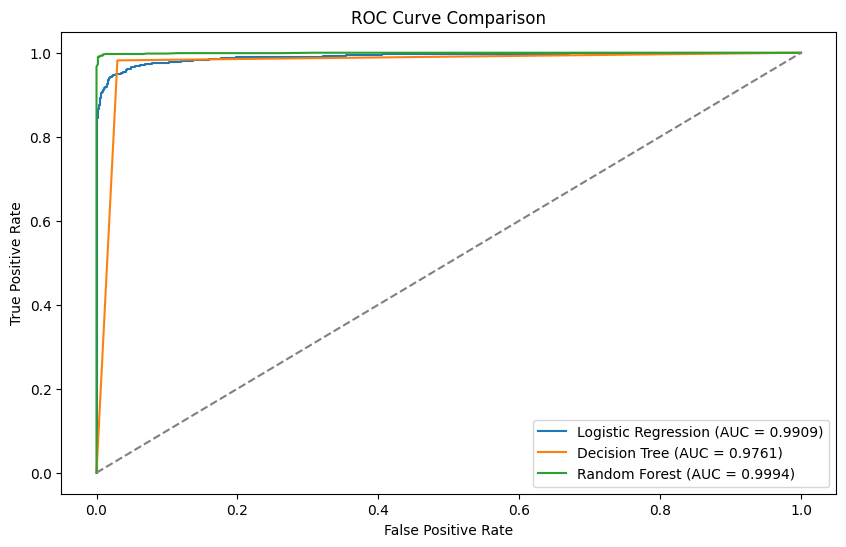

In [ ]:
#Assess phase

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curves for all models
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


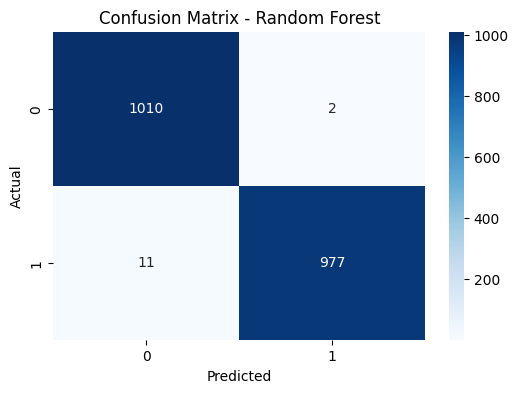

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1012
           1       1.00      0.99      0.99       988

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



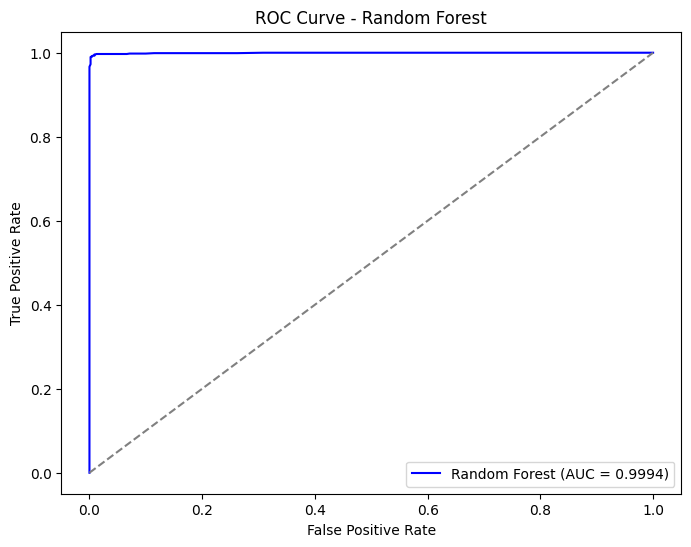

ROC-AUC Score: 0.9994


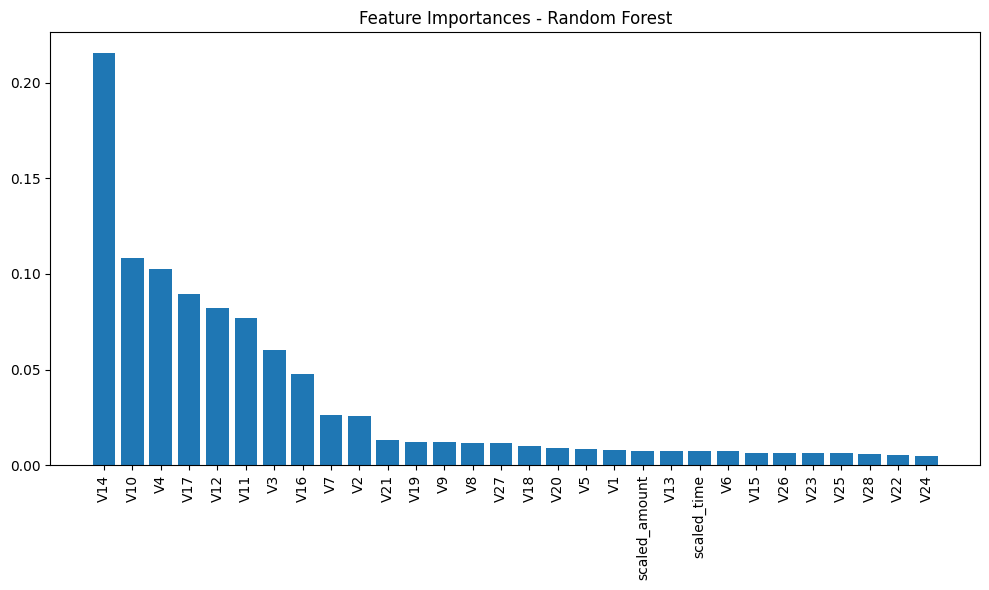

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Confusion Matrix
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Precision, Recall, and F1-Score
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred))

# 3. ROC-AUC Score and ROC Curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")

# 4. Feature Importance
importances = rf_model.feature_importances_
features = X_test.columns

# Plot feature importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X_test.shape[1]), importances[indices], align='center')
plt.xticks(range(X_test.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


# SEMMA Process Summary

## 1. Sample
In the **Sample** phase, we selected the **Credit Card Fraud Detection** dataset from Kaggle. The dataset contains anonymized transaction features and a binary classification target variable representing fraud (1) and non-fraud (0) transactions. Given the imbalanced nature of the dataset, we performed stratified sampling to ensure a balanced representation of both classes in our analysis. This allowed us to work efficiently with a smaller subset of the data while maintaining the class distribution.

## 2. Explore
During the **Explore** phase, we performed Exploratory Data Analysis (EDA) to understand the characteristics of the dataset:
- We visualized the **class distribution** to examine the imbalance between fraud and non-fraud transactions.
- Summary statistics and **correlation analysis** helped us identify relationships between variables.
- We also visualized key features such as `Amount` and `Time` to better understand the differences between fraudulent and non-fraudulent transactions.
- The heatmap of feature correlations showed no strong linear relationships, likely due to the PCA-transformed features.

## 3. Modify
In the **Modify** phase, we prepared the data for modeling:
- **Feature Scaling**: We standardized the `Amount` and `Time` features, as these are not PCA-transformed like the rest of the dataset.
- **Handling Class Imbalance**: We applied **SMOTE** (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class (fraud), addressing the class imbalance in the dataset.
- We created a final dataset, ready for modeling, which included the scaled features and the synthetically balanced classes.

## 4. Model
For the **Model** phase, we trained and evaluated three machine learning models:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**

We used **classification metrics** such as precision, recall, F1-score, and ROC-AUC to evaluate model performance. After comparing the models, **Random Forest** was selected as the best-performing model due to its high accuracy (99%) and near-perfect ROC-AUC score (0.9994), making it the most capable of identifying fraud.

## 5. Assess
In the **Assess** phase, we conducted a more detailed evaluation of the final model (Random Forest):
- We visualized the **confusion matrix** to assess the balance between true positives, false positives, true negatives, and false negatives.
- The **classification report** highlighted excellent precision and recall for both fraud and non-fraud transactions, with an F1-score close to 1 for both classes.
- The **ROC Curve** demonstrated the model’s excellent performance in distinguishing between fraud and non-fraud cases.
- Lastly, we examined **feature importance** to understand which features contributed the most to the model's predictions, with the PCA-transformed features being the most significant.

## Conclusion
Through the SEMMA process, we developed a robust fraud detection model using a Random Forest classifier. The model was carefully trained, evaluated, and optimized to handle imbalanced data, achieving high accuracy and strong predictive performance. The model is now ready for deployment, where it can be used to detect fraudulent transactions in real-world scenarios.
